In [23]:
import xlrd
import scipy.stats
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [7]:
sheet = xlrd.open_workbook('220204 BCL.xlsx').sheet_by_index(1)

In [8]:
species=sheet.col_values(0)[2:][:sheet.col_values(0)[2:].index('')]
subspecies=sheet.col_values(0)[2:][sheet.col_values(0)[2:].index('')+1:]

In [9]:
WTc=[]
KOc=[]
WTm=[]
KOm=[]
for k in range(2,len(species)+2):
    WTc.append(sheet.row_values(k)[1:4])
    KOc.append(sheet.row_values(k)[4:7])
    WTm.append(sheet.row_values(k)[8:11])
    KOm.append(sheet.row_values(k)[11:14])
sWTc=[]
sKOc=[]
sWTm=[]
sKOm=[]
for k in range(len(species)+3,len(species+subspecies)+3):
    sWTc.append(sheet.row_values(k)[1:4])
    sKOc.append(sheet.row_values(k)[4:7])
    sWTm.append(sheet.row_values(k)[8:11])
    sKOm.append(sheet.row_values(k)[11:14])


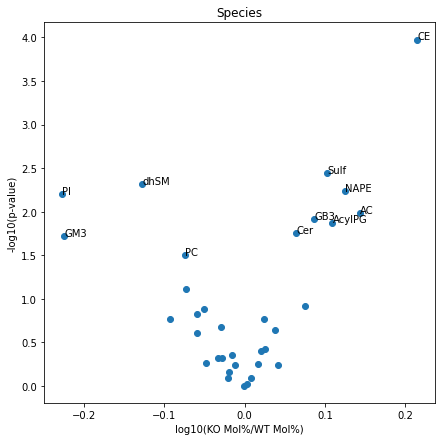

In [24]:
nlogp=[]
logfc=[]
for m in range(len(WTm)):
    nlogp.append(-(math.log10(scipy.stats.ttest_ind(WTm[m],KOm[m], equal_var=False)[1])))
    logfc.append(math.log10((sum(KOm[m])/len(KOm[m]))/(sum(WTm[m])/len(WTm[m]))))
fig, ax = plt.subplots()
ax.scatter(logfc,nlogp)
for i,txt in enumerate(species):
    if nlogp[i]>=1.3:
        ax.annotate(txt, (logfc[i],nlogp[i]), size=10)
fig.set_size_inches(7, 7)
plt.title('Species')
plt.xlabel('log10(KO Mol%/WT Mol%)')
plt.ylabel('-log10(p-value)')
plt.savefig('Species.pdf') 

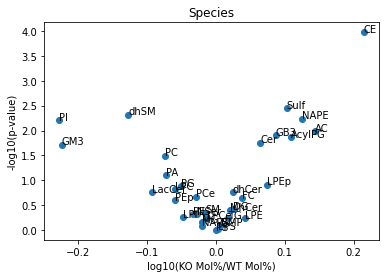

In [123]:
fig.set_size_inches(7, 7)

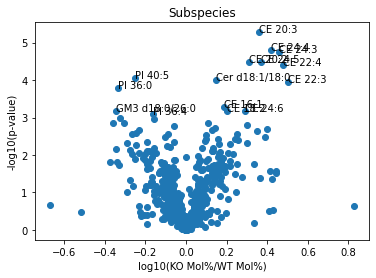

In [17]:
snlogp=[]
slogfc=[]
for m in range(len(sWTm)):
    snlogp.append(-(math.log10(scipy.stats.ttest_ind(sWTm[m],sKOm[m], equal_var=False)[1])))
    meansWTm=(sum(sWTm[m])/len(sWTm[m]))
    meansKOm=(sum(sKOm[m])/len(sKOm[m]))
    if meansWTm==0 or meansKOm==0:
        slogfc.append(0)
    else:
        slogfc.append(math.log10((sum(sKOm[m])/len(sKOm[m]))/(sum(sWTm[m])/len(sWTm[m])))) 
fig, ax = plt.subplots()
ax.scatter(slogfc,snlogp)
for i,txt in enumerate(subspecies):
    if snlogp[i]>=3:
        ax.annotate(txt, (slogfc[i],snlogp[i]))
plt.title('Subspecies')
plt.xlabel('log10(KO Mol%/WT Mol%)')
plt.ylabel('-log10(p-value)')
plt.savefig('Subspecies.pdf') 

In [141]:
for i,txt in enumerate(subspecies):
    ax.annotate(txt, (slogfc[i],snlogp[i]))

True

In [183]:
meansWTm=(sum(sWTm[575])/len(sWTm[575]))
meansKOm=(sum(sKOm[575])/len(sKOm[575]))

In [202]:
-math.log10(0.05)

1.3010299956639813

In [152]:
float(sum(sWTm[2])/len(sWTm[2]))

0.08978179747625627

In [168]:
(sum(sKOm[575])/len(sKOm[575])) or ==0

True

In [181]:
(sum(sWTm[575])/len(sWTm[575]) or sum(sKOm[575])/len(sKOm[575])) == 0

False

In [178]:
(sum(sWTm[575])/len(sWTm[575]))

1.0839251307281078e-06

In [182]:
(sum(sKOm[575])/len(sKOm[575]))==0

True

In [213]:
import csv
with open('Lipid Species', 'w', newline='') as file:
    for k in range(len(snlogp)):
        csv.writer(file).writerow([snlogp[k],slogfc[k]])